<a href="https://colab.research.google.com/github/vg11072001/Machine-Learning-Vault/blob/main/ml%20notes/propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability




Its a branch of mathematics helps to quanitify and make decisions in uncertain environment.

Important parts:
- Varibales
- probability distribution
- metrics
- graphical models

Information theory for signal to undestand data.


Event and Sample spcae:
- Heads and tails p(H) = 1/2 and p(T) = 1/2
- for cards P(spade) = 13/52,

Mutiple basic topics: Multiple independent obsevations, combining probabilities, combinatorics `(n k) = n!/(k!(n-k)!)`




In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
import scipy.stats as stats

np.random.seed(45)


In [ ]:

def coinflip_prob(n, k):
    return (factorial(n)/(factorial(k)*factorial(n-k)))/2**n

print(coinflip_prob(5,3))
print([coinflip_prob(5, h) for h in range(6)])

0.3125
[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]


`binomial()` method : draw samples from a binomial distribution.

The probability mass function (PMF) for the binomial distribution is $P(N) = \binom{n}{N} p^N (1-p)^{n-N}$


Where:

- $n$ = total number of trials
- $N$ = number of successes
- $p$ = probability of success on each trial
- $\binom{n}{N}$ = binomial coefficient (number of ways to choose $N$ successes from $n$ trials)

In [ ]:
ns = np.array([1,2,4,8,16,32,64,128,256,512,1024,2048,4096])
head_count = [np.random.binomial(n, 0.5) for n in ns]
proportion_heads = head_count/ns
print(f'head_count: {head_count}')
print(f'proportion_heads: {proportion_heads}')

head_count: [1, 1, 1, 2, 8, 16, 32, 60, 145, 265, 532, 1016, 2044]
proportion_heads: [1.         0.5        0.25       0.25       0.5        0.5
 0.5        0.46875    0.56640625 0.51757812 0.51953125 0.49609375
 0.49902344]


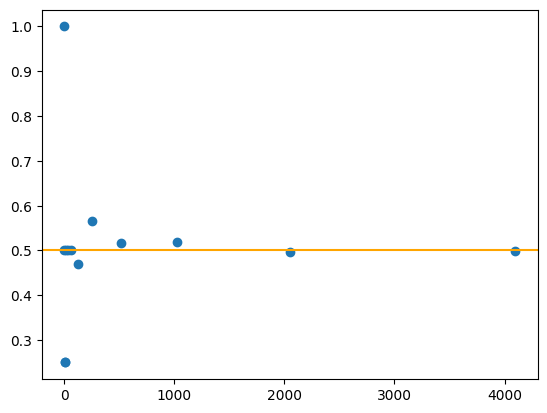

In [ ]:
fig, ax = plt.subplots()
plt.axhline(0.5, color='orange')
ax.scatter(ns, proportion_heads)

- The **law of large numbers** states that the more experiments we run, the closer we will tend to get to the expected probability.
- The **gambler's fallacy** is the incorrect belief that past events influence the probability of future independent events. In reality, each coin flip or roulette spin has the same fixed probability regardless of previous outcomes.
- Casinos exploit this misunderstanding by displaying historical outcomes, which tempts gamblers to mistakenly believe they can predict future results based on past performance, even though each event remains statistically independent.

Probability distributions in Statistics

* probability theory to make inferences with a quantifiable degree of confidence.

[0 1 2 3 4 5]
[1, 1, 1, 2, 8, 16, 32, 60, 145, 265, 532, 1016, 2044]
[ 29 173 311 308 149  30]
[0.029 0.173 0.311 0.308 0.149 0.03 ]


<BarContainer object of 6 artists>

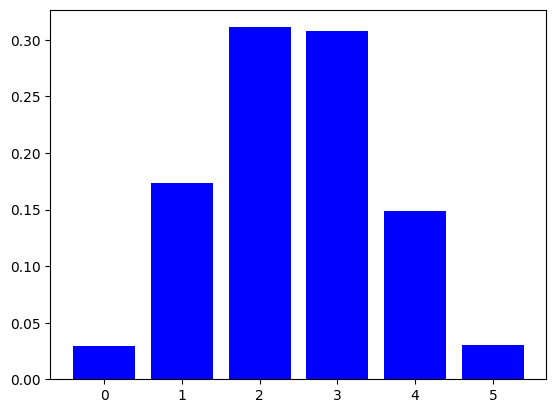

In [ ]:
coins = 5
n_experiments = 1000
head_counts = np.random.binomial(coins, 0.5, n_experiments)
heads, event_count = np.unique(head_counts, return_counts=True)
event_proba = event_count/n_experiments

print(heads)
print(head_count)
print(event_count)
print(event_proba)

# x - head flips (out of 5 tosses)
# y - event probability
# probability distribution
plt.bar(heads, event_proba, color = 'blue')


**Frequentist vs Bayesian**

1. Frequentist
    - Treats parameters as fixed but unknown and uses only the observed data for inference (no priors).
    - Relies on confidence intervals and p-values to interpret results but cannot directly assign probabilities to hypotheses.
2. Bayesian
    - Treats parameters as random variables and updates beliefs using prior distributions and observed data via Bayes' theorem.
    - Provides posterior probabilities, allowing direct probability statements about parameters and hypotheses.

- Interpretation of Probability:

    - **Frequentist**: Views probability as the long-run frequency of an event.
    - **Bayesian**: Interprets probability as a degree of belief or uncertainty about an event.

- Use of Priors:

    - Frequentist: Does not use prior knowledge; relies solely on observed data.
    - Bayesian: Incorporates prior knowledge through a prior distribution and updates it with new evidence.

- Inference:

    - Frequentist: Provides confidence intervals and p-values but cannot assign probabilities to parameters.
    - Bayesian: Calculates posterior probabilities, allowing direct probability statements about parameters and hypotheses.

**Application of Probability to ML**

- Bayesian stats a type of ML
    - sample size very large
    - have some evidence for initial (priors)
- Probability in AI
    - Uncertainity in inputs and outputs
    - Some stocashtics (randomness behavior) which we can say as non-deterministics
    - to compare model performance metrics involed stats
    - output probailities (defining how accurate model)

Why AI models can't be certain and deterministic?

- stochastic models - game of chance, human behaviour, stock market area, etc.
- model inputs are not comprehensive - car movement for model might not have each info on road, or canditate applying for job might have another offer, etc.
- model is incomplete - computational compexity(patterns) of perfect solutions is astronomical, modelling approach for solving problem can be unknown, building perfect model might be expensive


#### **Random Variables**:
- value determines having uncertainity
-
    - Discrete: (countable) number of states, category, integers
    - Continous: (float) real value, speed/height/temperature,

- **Probability Distributions**: describes likelihood of random variable(ex. probability of the event) taking on its possible values(ex. heads).


#### **Probability Mass Function (PMF)**
A **Probability Mass Function (PMF)** describes the probability distribution of a **discrete** random variable.

- Symbol: **Italic P**
- PMF: \( P(x) \)
- Range: \( 0 \leq P(x) \leq 1 \)
- Sum of all probabilities:  
  $$
  \sum P(x) = 1
  $$


#### **Probability Density Function (PDF)**
A **Probability Density Function (PDF)** describes the probability distribution of a **continuous** random variable.

- Symbol: **Lowercase p**
- PDF: \( p(x) \)
- Non-negative:  
  $$
  p(x) \geq 0
  $$
- Total probability (integral over all possible values):  
  $$
  \int_{-\infty}^{\infty} p(x) dx = 1
  $$
- Probability between two values \( a \) and \( b \):  
  $$
  P(a \leq X \leq b) = \int_{a}^{b} p(x) dx
  $$


#### **Cumulative Density Function (CDF)**

A **Cumulative Density Function (CDF)** describes the probability that a **continuous** random variable \(X\) takes a value **less than or equal to** a given point.

- Symbol: **Uppercase F**
- CDF: \(F(x)\)
- Non-decreasing function:
  $$
  0 \leq F(x) \leq 1
  $$
- Defined as the integral of the PDF:
  $$
  F(x) = P(X \leq x) = \int_{-\infty}^{x} p(t) dt
  $$
- Probability between two values \(a\) and \(b\):
  $$
  P(a \leq X \leq b) = F(b) - F(a)
  $$



**Expected Value**

- The longterm average of some random varibale $x$. It represent the center of the distribution, Mean.
- For discrete $x$: $$ \mathbb{E} = \sum_x xP(x) $$
    - for above example mention about X and event probability, there we calculated below is code
- For Continuous $x$: $$ \mathbb{E} = \int xP(x) dx $$


**Expectation of Squared Value \( E[X^2] \)**
  - Represents the **expected squared value** of a random variable.
  - For discrete variables:  
    $$[ E[X^2] = \sum x_i^2 P(x_i) ]$$
  - For continuous variables:  
    $$[ E[X^2] = \int_{-\infty}^{\infty} x^2 f(x) \,dx]$$

**Variance \( \text{Var}(X) \)**
  - Measures the **spread** of the values of \( X \).
  - Formula:  
    $$[ \text{Var}(X) = E[X^2] - (E[X])^2 ]$$
  - A higher variance indicates a **greater spread** of data.

In [ ]:
p = [coinflip_prob(5,x) for x in range(6)]
print(p)
E = sum([x*p[x] for x in range(6)])
print(E)

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]
2.5


DISTRIBUTIONS

**Mean: measure of central tendency**
- $$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

> Expected value is in fact the long-term mean of some function (i.e.,  μ=E ). Let's calculate how close the sample mean,  x¯ , of our five-coin-flip experiments comes to the expected value,  E=2.5 .

In [ ]:
print(head_counts[0:40]) # value of head on each time
print(len(head_counts)) # lenght of value
print(sum(head_counts)/len(head_counts)) # mean
print(np.mean(head_counts))

[4 1 4 2 3 1 3 2 4 2 2 3 2 1 3 2 4 2 1 4 3 1 4 1 1 1 4 3 2 2 5 3 2 1 2 2 2
 3 3 2]
1000
2.465
2.465


**Median**

- mid point value in the distribution

In [ ]:
head_counts.sort()
print(head_counts[-20:])
print((head_counts[(len(head_counts)//2)-1] + head_counts[len(head_counts)//2])/2)
print(np.median(head_counts))

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
2.0
2.0


**Mode**
- most occured frequency
- only applicable for PMFs

In [ ]:
print(st.mode(head_counts))

ModeResult(mode=2, count=311)


- for many case when distribution is not skewed the mean, meadian and mode does coincide
- for small sample size means is good most accurate
-  For continuous distributions with skew (one tail or other) (e.g., salary data), median is typically the choice measure of central tendency
-  For discrete distributions with/withot skew, mode doesn't get effected

(array([  3.,  13.,  51., 126., 220., 241., 199., 100.,  40.,   7.]),
 array([-3.44262126, -2.79694315, -2.15126504, -1.50558693, -0.85990882,
        -0.21423071,  0.43144739,  1.0771255 ,  1.72280361,  2.36848172,
         3.01415983]),
 <BarContainer object of 10 artists>)

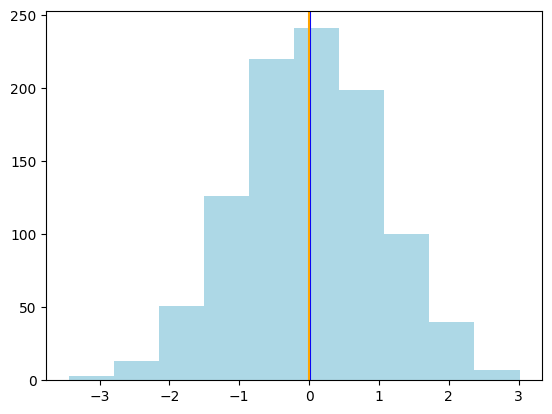

In [ ]:
x = st.skewnorm.rvs(0, size=1000) #0 means no skew

#figure
fig, ax = plt.subplots()
plt.axvline(x=np.mean(x), color='blue')
plt.axvline(x=np.median(x), color='orange')
plt.hist(x, color='lightblue')

(array([241., 204., 197., 146., 100.,  52.,  37.,  12.,   5.,   6.]),
 array([-0.01508077,  0.30288384,  0.62084845,  0.93881305,  1.25677766,
         1.57474227,  1.89270687,  2.21067148,  2.52863608,  2.84660069,
         3.1645653 ]),
 <BarContainer object of 10 artists>)

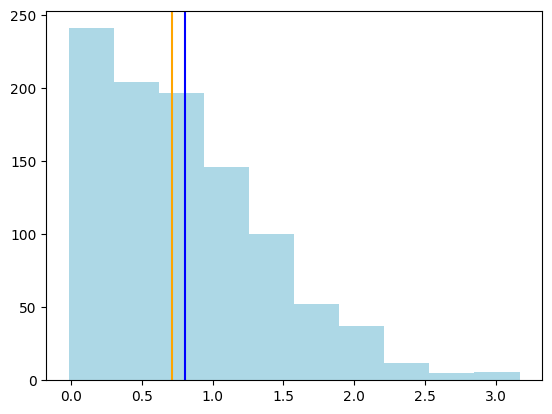

In [ ]:
x = st.skewnorm.rvs(140, size=1000) #0 means no skew

#figure
fig, ax = plt.subplots()
plt.axvline(x=np.mean(x), color='blue')
plt.axvline(x=np.median(x), color='orange')
plt.hist(x, color='lightblue')

**Quantiles, Percentiles , Quartiles and Deciles**
mehtds to divide the distributions with following methods
- quantiles and percentiles are almost same values we get, just quantile have 0-1 and percentile have 0-100 values range
- quartiles, give the quarters
- deciles, divded into 10

median 0.7102735643602696
quantiles 0.7102735643602696
percentile [1.63996114 1.95766748]


(array([241., 204., 197., 146., 100.,  52.,  37.,  12.,   5.,   6.]),
 array([-0.01508077,  0.30288384,  0.62084845,  0.93881305,  1.25677766,
         1.57474227,  1.89270687,  2.21067148,  2.52863608,  2.84660069,
         3.1645653 ]),
 <BarContainer object of 10 artists>)

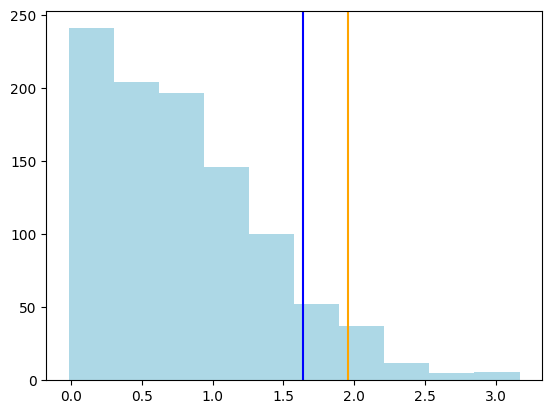

In [ ]:
print(f'median {np.median(x)}')
print(f'quantiles {np.quantile(x, 0.5)}')
print(f'percentile {np.percentile(x, [90, 95])}')

fig, ax = plt.subplots()
p = np.percentile(x, [90, 95])
plt.axvline(x = p[0], color = 'blue')
plt.axvline(x = p[1], color = 'orange')
plt.hist(x, color='lightblue')

quartiles [0.31717971 0.71027356 1.16098844]


(array([241., 204., 197., 146., 100.,  52.,  37.,  12.,   5.,   6.]),
 array([-0.01508077,  0.30288384,  0.62084845,  0.93881305,  1.25677766,
         1.57474227,  1.89270687,  2.21067148,  2.52863608,  2.84660069,
         3.1645653 ]),
 <BarContainer object of 10 artists>)

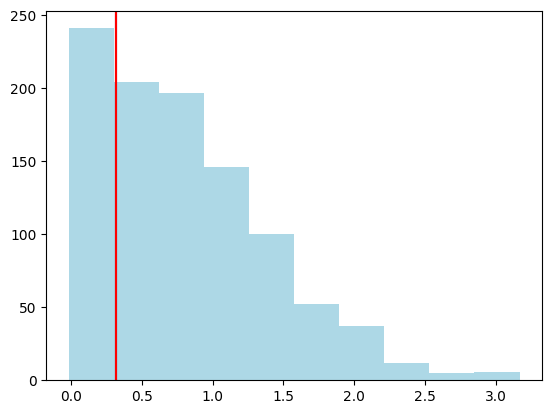

In [ ]:

print(f'quartiles {np.percentile(x,[25,50, 75])}')

fig, ax = plt.subplots()
q = np.percentile(x, [25,50,75])
plt.axvline(x=q[0], color = 'blue')
plt.axvline(x=q[0], color = 'orange')
plt.axvline(x=q[0], color = 'red')
plt.hist(x, color='lightblue')



deciles [0.12302573 0.24502471 0.39986196 0.53267852 0.71027356 0.87209504
 1.05005475 1.29302898 1.63996114]


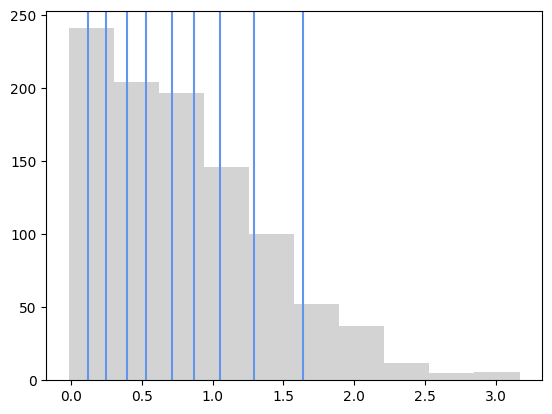

In [ ]:
print(f'deciles {np.percentile(x,range(10, 100, 10))}')
d = np.percentile(x,range(10, 100, 10))
fig, ax = plt.subplots()
[plt.axvline(x = d_i, color='cornflowerblue') for d_i in d]
_ = plt.hist(x, color = 'lightgray')

**Boxplot and whisker plot**

- box edges: inter-quantile range(IQR)
- box edges and median determined by quartiles
- Edges of the Box:

    - Lower Edge (Q1): Represents the first quartile (25th percentile) of the data, where 25% of the data points lie below this value.
    - Upper Edge (Q3): Represents the third quartile (75th percentile), where 75% of the data points lie below this value.

- The box itself shows the interquartile range (IQR), which is the middle 50% of the data: $$IQR=Q3−Q1$$

- Whiskers:
    - The lower whisker extends to the smallest data point within  $$Q1−1.5×IQR$$
    - The upper whisker extends to the largest data point within $$Q3+1.5×IQR$$

<Axes: >

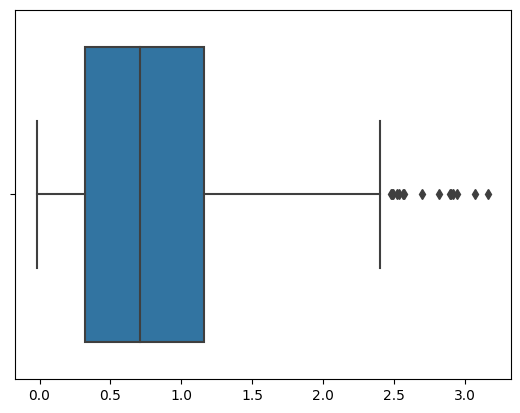

In [ ]:
sns.boxplot(x=x)

In [ ]:
print(f'q: {q}')
r = q[2] - q[0]
print(f'r: {r}')
print(f'lower whisker: {q[0] - r*1.5}')
print(f'upper whisker: {q[2] + r*1.5}')
x.sort()
print(f'outlier: {x[-15:]}')

q: [0.31717971 0.71027356 1.16098844]
r: 0.8438087321168133
lower whisker: -0.9485333876494619
upper whisker: 2.426701540817791
outlier: [2.48181897 2.48523263 2.49435027 2.52273304 2.53609511 2.56463365
 2.56970884 2.70040443 2.8162952  2.89489246 2.90056788 2.91222101
 2.94502918 3.06859331 3.1645653 ]


<Axes: >

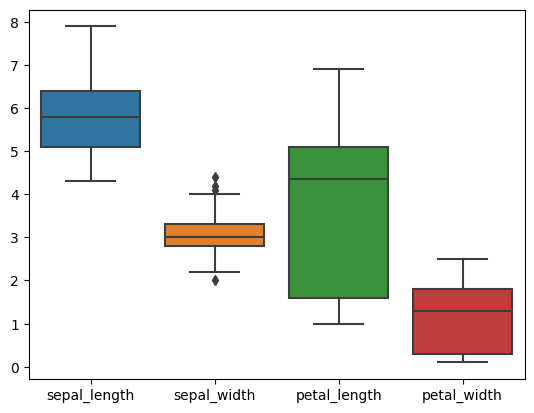

In [ ]:
iris = sns.load_dataset('iris')
sns.boxplot(data=iris)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='day', ylabel='total_bill'>

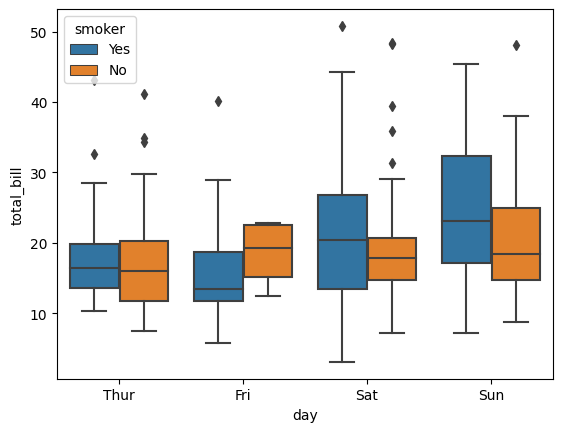

In [ ]:
tips = sns.load_dataset('tips')
sns.boxplot(x ='day', y='total_bill', hue='smoker', data=tips)

**Measures of Dispersion**

- Variance:
$$\text{Variance} (\sigma^2) = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2$$

-  Standard deviation:
$$\text{Standard Deviation} (\sigma) = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}$$

- Standard error: The standard error represents the standard deviation of the sample mean:  
    - good to compare the 2 diffrent distribution
$$\text{Standard Error} = \frac{\sigma}{\sqrt{N}}$$

**Measure of Relatedness**


- cov()
- p value
-

**Relationships Between Probabilities (properties)**


*Joint probability*
- The probability of two events \( A \) and \( B \) occurring together:  $$P(A \cap B) \text{ or } P(A, B)$$

*Marginal Probability*
- The probability of a single event \( A \), regardless of other events:  $$P(A) = \sum_{B} P(A, B)$$

*Conditional Probability*
- The probability of \( A \) occurring given that \( B \) has occurred:  $$P(A \mid B) = \frac{P(A \cap B)}{P(B)}, \; P(B) > 0$$

*Chain Rule of Probability*
- Expresses the joint probability of multiple events as a product of conditional probabilities: $$P(A_1, A_2, \dots, A_n) = P(A_1) \cdot P(A_2 \mid A_1) \cdot \dots \cdot P(A_n \mid A_1, \dots, A_{n-1})$$

*Independent Random Varibales*
- Two events \( A \) and \( B \) are independent if: $$P(A \cap B) = P(A) \cdot P(B)$$

*Conditional Independence*
- Two events \( A \) and \( B \) are conditionally independent given \( C \) if: $$P(A \cap B \mid C) = P(A \mid C) \cdot P(B \mid C)$$



**Distributions in Machine learning**





Key Takeaways/ prerequisite of distribution

- **Expectation (Mean) \( E[X] \)**
  - Represents the **average value** of a random variable.
  - For discrete variables:  
    $$[ E[X] = \sum x_i P(x_i) ]$$
  - For continuous variables:  
    $$[ E[X] = \int_{-\infty}^{\infty} x f(x) \,dx ]$$

- **Expectation of Squared Value \( E[X^2] \)**
  - Represents the **expected squared value** of a random variable.
  - For discrete variables:  
    $$[ E[X^2] = \sum x_i^2 P(x_i) ]$$
  - For continuous variables:  
    $$[ E[X^2] = \int_{-\infty}^{\infty} x^2 f(x) \,dx]$$

- **Variance $( \text{Var}(X) )$**
  - Measures the **spread** of the values of \( X \).
  - Formula:  
    $$[ \text{Var}(X) = E[X^2] - (E[X])^2 ]$$
  - A higher variance indicates a **greater spread** of data.

- **Key Interpretation**
  - \( E[X] \) is the **mean**.
  - \( E[X^2] \) captures **squared values**' expectation.
  - **Variance** tells us **how far** values are from the mean.



## *Uniform Distribution*
- In this uniform distribution, all range of values in it domain have some constant probabilities

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


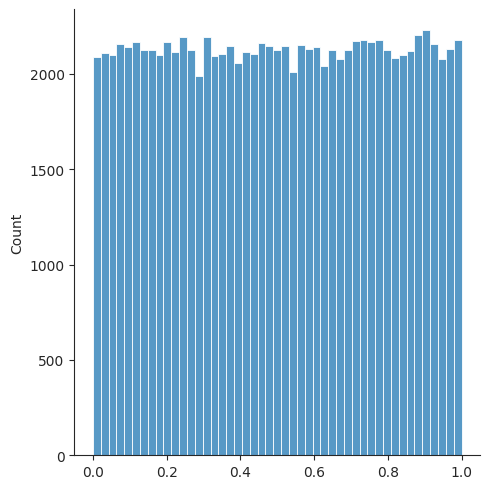

In [ ]:
u = np.random.uniform(size=100000)
sns.set_style('ticks')
sns.displot(u)

- above mentioned is continous distrubitons
- numpy randome will by default will be uniform distribution, also whatever values present in range 0.0-1.0 , the probability of sampling a point at any part is equal.
- bucket of same sizee, as you increase the size more, more bucket will look same.
- Example: discrete - Dice Rolling, Card Drawing ::: continous - Model hyper parameters, emission of radioactive particles
- probability density function $$P(x)= {0 for x<a, i/b-a for a<=x<=b, 0 for x>b}$$
- cumulative disribution $$D(x) = {0 for x<a, (x-a)/(b-a) for a<=x<=b, 1 for x>b}$$
<!-- - Basic covered here: ![image.png](attachment:a0be53e9-5b94-49d4-a068-fcd39e9b5b15.png) -->


## Variance of Uniform Distribution

The variance of a **Uniform Distribution** \( U(a, b) \) can be derived step by step.

## 1. Uniform Distribution Definition
A **continuous uniform distribution** on the interval \( [a, b] \) has a **probability density function (PDF)**:

$$
f(x) = \frac{1}{b-a}, \quad a \leq x \leq b
$$

## 2. Expectation \( E[X] \)
The **expected value (mean)** of \( X \) is:

$$
E[X] = \int_a^b x f(x) \,dx = \int_a^b x \cdot \frac{1}{b-a} \,dx
$$

$$
= \frac{1}{b-a} \int_a^b x \,dx
$$

Since:

$$
\int x \,dx = \frac{x^2}{2}
$$

Evaluating from \( a \) to \( b \):

$$
E[X] = \frac{1}{b-a} \left[ \frac{b^2}{2} - \frac{a^2}{2} \right]
$$

$$
= \frac{1}{b-a} \cdot \frac{b^2 - a^2}{2}
$$

$$
= \frac{b + a}{2}
$$

## 3. Expectation of \( X^2 \), \( E[X^2] \)

$$
E[X^2] = \int_a^b x^2 f(x) \,dx = \int_a^b x^2 \cdot \frac{1}{b-a} \,dx
$$

$$
= \frac{1}{b-a} \int_a^b x^2 \,dx
$$

Since:

$$
\int x^2 \,dx = \frac{x^3}{3}
$$

Evaluating from \( a \) to \( b \):

$$
E[X^2] = \frac{1}{b-a} \left[ \frac{b^3}{3} - \frac{a^3}{3} \right]
$$

$$
= \frac{1}{b-a} \cdot \frac{b^3 - a^3}{3}
$$

$$
= \frac{b^3 - a^3}{3(b-a)}
$$

Using the **difference of cubes identity**:

$$
b^3 - a^3 = (b-a)(b^2 + ab + a^2)
$$

$$
E[X^2] = \frac{b^2 + ab + a^2}{3}
$$

## 4. Variance \( \text{Var}(X) \)

$$
\text{Var}(X) = E[X^2] - (E[X])^2
$$

$$
= \frac{b^2 + ab + a^2}{3} - \left(\frac{b + a}{2} \right)^2
$$

Expanding:

$$
\left(\frac{b+a}{2}\right)^2 = \frac{b^2 + 2ab + a^2}{4}
$$

$$
\text{Var}(X) = \frac{b^2 + ab + a^2}{3} - \frac{b^2 + 2ab + a^2}{4}
$$

Finding the common denominator (12):

$$
= \frac{4(b^2 + ab + a^2) - 3(b^2 + 2ab + a^2)}{12}
$$

$$
= \frac{4b^2 + 4ab + 4a^2 - 3b^2 - 6ab - 3a^2}{12}
$$

$$
= \frac{b^2 - 2ab + a^2}{12}
$$

$$
= \frac{(b-a)^2}{12}
$$

## Final Answer

$$
\text{Var}(X) = \frac{(b-a)^2}{12}
$$



In [ ]:
class UniformDistribution:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def pdf(self, x):
        """ Probability Density Function (PDF) """
        if self.a <= x <= self.b:
            return 1 / (self.b - self.a)
        return 0

    def mean(self):
        """ Expected value (Mean) """
        return (self.a + self.b) / 2

    def variance(self):
        """ Variance """
        return (self.b - self.a) ** 2 / 12

a, b = 2, 5
uniform_dist = UniformDistribution(a, b)

x = np.linspace(a - 1, b + 1, 100)

# Compute PDF values
pdf_values = np.array([uniform_dist.pdf(xi) for xi in x])

# Compute mean and variance
mean_value = uniform_dist.mean()
variance_value = uniform_dist.variance()

print(f"Mean: {mean_value}")
print(f"Variance: {variance_value}")


Mean: 3.5
Variance: 0.75


## *Gaussian Distribution/Normal Distribution*

- famous for bell curve


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


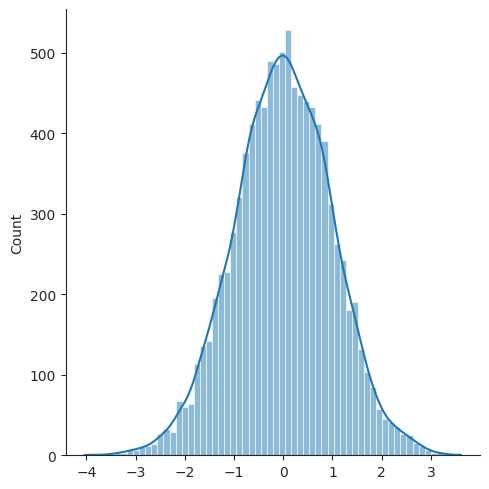

In [ ]:
x = np.random.normal(size=10000)
sns.displot(x, kde = True)  #kde : kernel density estimate

- its called a standard normal/gaussian distribution. It can be denoted as $N(mu, sigma square)$ => standard normal D is $N(0,1)$.
- The standard deviation and variance will be same in this case.

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial.
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called central limit theorem (covered next) is a critically important concept.


- Real-world examples include:
    - Probability of heads across n tosses (PMF; n=5 earlier,n=100 below)
    - Sum of di(c)e rolls (PMF)
    - Height of adult women
    - Height of adult men
    - Education test scores, e.g., SAT


In [ ]:
print(f' mean of uniform /normal = {np.mean(x)}')
print(f' standard dev. of uniform /normal = {np.std(x)}')

 mean of uniform /normal = 0.000272888833137203
 standard dev. of uniform /normal = 0.9923244691660663


### **Derivation of Variance for Normal (Gaussian) Distribution**

A **Normal (Gaussian) distribution** $( X \sim N(\mu, \sigma^2) )$ has the probability density function (PDF):

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}, \quad -\infty < x < \infty
$$

where:
- $( \mu )$ is the **mean (expected value)** of \( X \).
- $( \sigma^2 )$ is the **variance**.
- $( \sigma )$ is the **standard deviation**.

#### **1. Expected Value \( E[X] \)**

$$
E[X] = \int_{-\infty}^{\infty} x f(x) dx
$$

Since $( f(x) )$ is symmetric around $( \mu )$, we get:

$$
E[X] = \mu
$$


#### **2. Expected Value of \( X^2 \), \( E[X^2] \)**

$$
E[X^2] = \int_{-\infty}^{\infty} x^2 f(x) dx
$$

Using a property of Gaussian integrals, we get:

$$
E[X^2] = \sigma^2 + \mu^2
$$



#### **3. Variance $( \text{Var}(X) )$**

$$
\text{Var}(X) = E[X^2] - (E[X])^2
$$

Substituting values:

$$
\text{Var}(X) = (\sigma^2 + \mu^2) - \mu^2
$$

$$
= \sigma^2
$$

Thus, the **variance of a normal distribution** is:

$$
\text{Var}(X) = \sigma^2
$$



### **Derivation of Variance for Standard Normal Distribution**

A **Standard Normal Distribution** is a special case of \( N(\mu, \sigma^2) \) where \( \mu = 0 \) and \( \sigma^2 = 1 \):

In this the mean == mode == median

$$
Z \sim N(0,1)
$$

For standard normal:

- \( E[Z] = 0 \)
- \( E[Z^2] = 1 \)

Thus:

$$
\text{Var}(Z) = E[Z^2] - (E[Z])^2 = 1 - 0^2 = 1
$$


## **Final Results**
- For $( X \sim N(\mu, \sigma^2) )$:  
  $$
  \text{Var}(X) = \sigma^2
  $$
- For **Standard Normal** $( Z \sim N(0,1) )$:  
  $$
  \text{Var}(Z) = 1
  $$



[0.0001 0.0002 0.0009 0.0008 0.0015 0.0027 0.0038 0.0058 0.0118 0.017
 0.0216 0.0308 0.0402 0.0523 0.0563 0.0681 0.0727 0.0734 0.0756 0.0797
 0.0763 0.069  0.0549 0.0492 0.038  0.0283 0.022  0.0155 0.012  0.0075
 0.0054 0.0028 0.0023 0.0007 0.0003 0.0002 0.0001 0.0002]


Text(0.5, 0, 'Head flips (out of 100 tosses)')

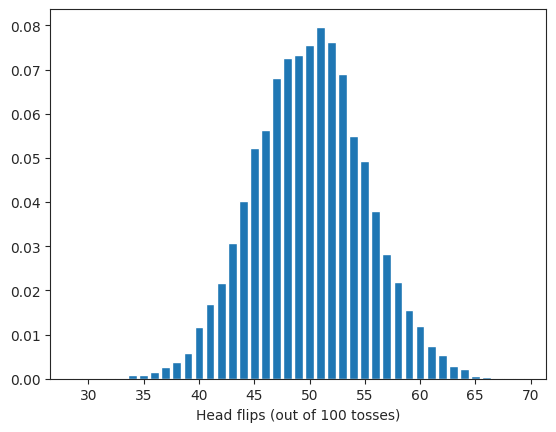

In [ ]:
n_exp = 10000
head_count = [np.random.binomial(100, 0.5) for i in range(n_exp)]
heads, event_count = np.unique(head_count, return_counts = True)
event_proba = event_count/n_exp
print(event_proba)

plt.bar(heads, event_proba)
plt.xlabel('Head flips (out of 100 tosses)')

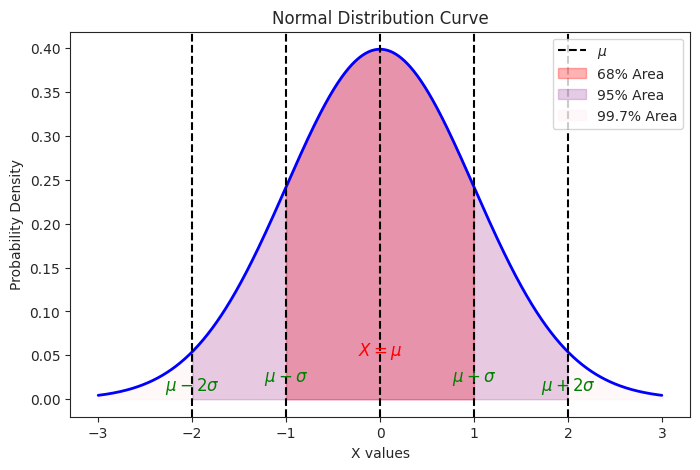

In [ ]:

# Generate x values from μ - 3σ to μ + 3σ
mu, sigma = 0, 1  # Standard normal distribution (mean=0, std=1)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

# Plot normal distribution curve
plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue', linewidth=2)

# Standard deviations and their coverage
plt.axvline(mu, color='black', linestyle='dashed', label=r'$\mu$')
plt.axvline(mu - sigma, color='black', linestyle='dashed')
plt.axvline(mu + sigma, color='black', linestyle='dashed')
plt.axvline(mu - 2*sigma, color='black', linestyle='dashed')
plt.axvline(mu + 2*sigma, color='black', linestyle='dashed')

# Annotate confidence intervals
plt.text(mu, 0.05, r'$X = \mu$', ha='center', fontsize=12, color='red')
plt.text(mu - sigma, 0.02, r'$\mu - \sigma$', ha='center', fontsize=12, color='green')
plt.text(mu + sigma, 0.02, r'$\mu + \sigma$', ha='center', fontsize=12, color='green')
plt.text(mu - 2*sigma, 0.01, r'$\mu - 2\sigma$', ha='center', fontsize=12, color='green')
plt.text(mu + 2*sigma, 0.01, r'$\mu + 2\sigma$', ha='center', fontsize=12, color='green')

plt.fill_between(x, y, where=(x >= mu - sigma) & (x <= mu + sigma), color='red', alpha=0.3, label="68% Area")
plt.fill_between(x, y, where=(x >= mu - 2*sigma) & (x <= mu + 2*sigma), color='purple', alpha=0.2, label="95% Area")
plt.fill_between(x, y, where=(x >= mu - 3*sigma) & (x <= mu + 3*sigma), color='pink', alpha=0.1, label="99.7% Area")

plt.xlabel('X values')
plt.ylabel('Probability Density')
plt.title('Normal Distribution Curve')
plt.legend()
plt.show()


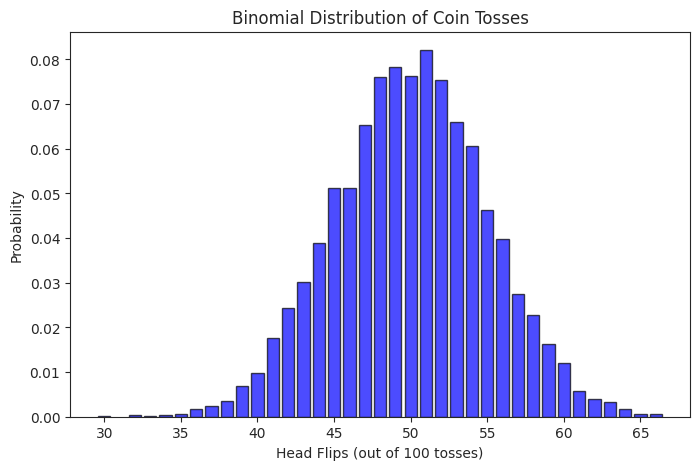

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_exp = 10000  # Number of experiments
head_count = [np.random.binomial(100, 0.5) for _ in range(n_exp)]  # Simulate 100 coin flips per experiment
heads, event_count = np.unique(head_count, return_counts=True)  # Unique values and their counts
event_proba = event_count / n_exp  # Compute probabilities

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(heads, event_proba, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Head Flips (out of 100 tosses)')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Coin Tosses')
plt.show()

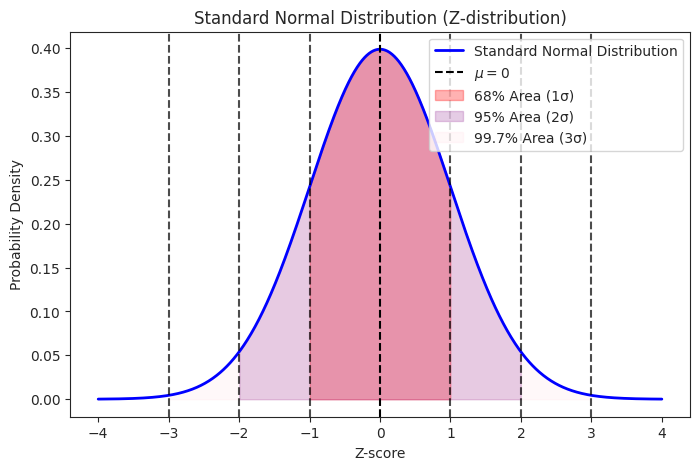

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define standard normal distribution (mean = 0, std dev = 1)
mu, sigma = 0, 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)  # Range from -4 to +4 standard deviations
y = stats.norm.pdf(x, mu, sigma)  # Probability density function (PDF)

# Plot the standard normal curve
plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue', linewidth=2, label='Standard Normal Distribution')

# Draw standard deviation markers
plt.axvline(mu, color='black', linestyle='dashed', label=r'$\mu = 0$')
plt.axvline(mu - sigma, color='black', linestyle='dashed', alpha=0.7)
plt.axvline(mu + sigma, color='black', linestyle='dashed', alpha=0.7)
plt.axvline(mu - 2*sigma, color='black', linestyle='dashed', alpha=0.7)
plt.axvline(mu + 2*sigma, color='black', linestyle='dashed', alpha=0.7)
plt.axvline(mu - 3*sigma, color='black', linestyle='dashed', alpha=0.7)
plt.axvline(mu + 3*sigma, color='black', linestyle='dashed', alpha=0.7)

# Fill areas under the curve for standard deviations
plt.fill_between(x, y, where=(x >= mu - sigma) & (x <= mu + sigma), color='red', alpha=0.3, label="68% Area (1σ)")
plt.fill_between(x, y, where=(x >= mu - 2*sigma) & (x <= mu + 2*sigma), color='purple', alpha=0.2, label="95% Area (2σ)")
plt.fill_between(x, y, where=(x >= mu - 3*sigma) & (x <= mu + 3*sigma), color='pink', alpha=0.1, label="99.7% Area (3σ)")

# Labels and title
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution (Z-distribution)')
plt.legend()
plt.show()


- ![image.png](attachment:7e6ba31a-853f-492b-a2e7-b6a67835c28f.png)
- ![image.png](attachment:aabe6bbe-469b-4b63-9d9a-c57c85801395.png)

First 5 PDF values: [0.00013383 0.0001843  0.00025214 0.00034271 0.00046278]
First 5 CDF values: [3.16712418e-05 4.44231742e-05 6.19233895e-05 8.57837169e-05
 1.18103990e-04]


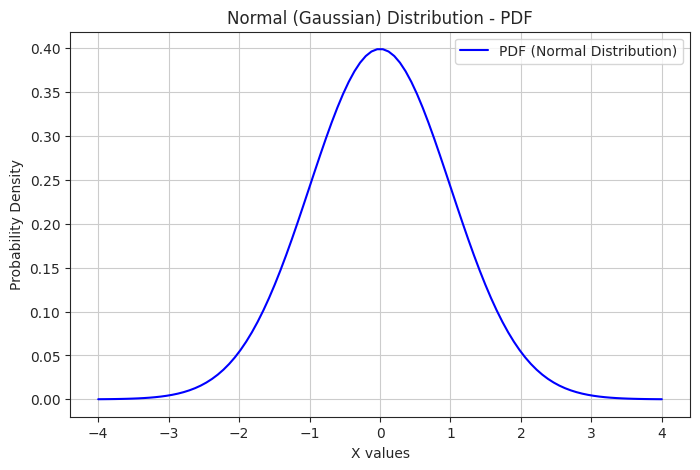

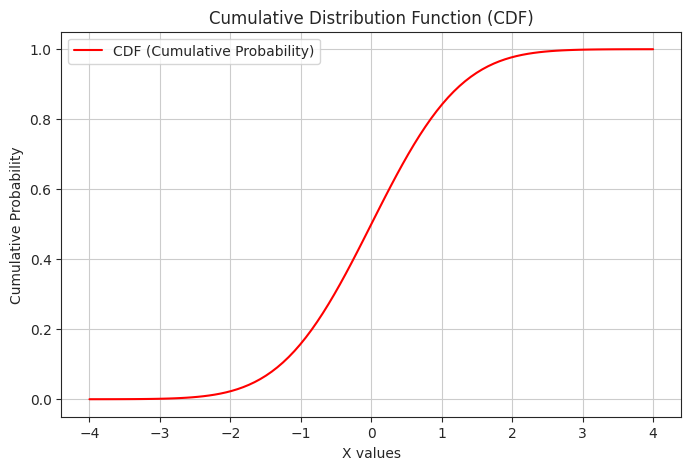

In [ ]:
import numpy as np
import scipy.special as sp  # Import error function (erf)

def normal_pdf(x, mu=0, sigma=1):
    """Compute the Probability Density Function (PDF) of a normal distribution."""
    coeff = 1 / (np.sqrt(2 * np.pi * sigma**2))
    exponent = np.exp(-((x - mu) ** 2) / (2 * sigma**2))
    return coeff * exponent

# Example Usage
mu, sigma = 0, 1  # Mean and Standard Deviation
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)  # Generate x values
pdf_values = normal_pdf(x, mu, sigma)  # Compute PDF

print("First 5 PDF values:", pdf_values[:5])

def normal_cdf(x, mu=0, sigma=1):
    """Compute the Cumulative Distribution Function (CDF) of a normal distribution."""
    return 0.5 * (1 + sp.erf((x - mu) / (sigma * np.sqrt(2))))

# Example Usage
cdf_values = normal_cdf(x, mu, sigma)  # Compute CDF

print("First 5 CDF values:", cdf_values[:5])


# Plot PDF
plt.figure(figsize=(8, 5))
plt.plot(x, pdf_values, label="PDF (Normal Distribution)", color="blue")
plt.xlabel("X values")
plt.ylabel("Probability Density")
plt.title("Normal (Gaussian) Distribution - PDF")
plt.legend()
plt.grid()

# Plot CDF
plt.figure(figsize=(8, 5))
plt.plot(x, cdf_values, label="CDF (Cumulative Probability)", color="red")
plt.xlabel("X values")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.legend()
plt.grid()

plt.show()


**Central Limit Theorem**


## **Central Limit Theorem (CLT)**
The **Central Limit Theorem (CLT)** states that, given a sufficiently large sample size \( n \), the sampling distribution of the sample mean \( \bar{X} \) approaches a normal distribution, regardless of the shape of the original population distribution.

If \( X_1, X_2, ..., X_n \) are independent and identically distributed (i.i.d.) random variables with mean \( \mu \) and variance \( \sigma^2 \), then the standardized sample mean:

$$
Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}
$$

converges in distribution to a standard normal distribution:

$$
Z \sim N(0,1) \quad \text{as} \quad n \to \infty.
$$

This implies that for large $( n )$, the distribution of $( \bar{X} )$ is approximately:

$$
\bar{X} \sim N\left(\mu, \frac{\sigma^2}{n}\right).
$$

where $\mu$ remains same and **variance** get $(\frac{\sigma^2}{n})$
The CLT is fundamental in statistics, as it enables inference about population parameters using sample statistics.


In [ ]:
# we will implement this part
x = np.random.normal(size=10000) #gaussian/normal popluation data
x_sample = np.random.choice(x, replace = False, size = 10)
print(x)
print(np.mean(x))
print(np.std(x))
print(x_sample)
print(np.mean(x_sample)) # ~ to old mean
print(np.std(x_sample)) # old variance / size of sample

[-0.82824183  0.3001738   1.02751533 ... -0.467134   -0.07831107
 -1.4689689 ]
-0.0008539101135749775
0.999576341416321
[ 1.44224773  0.01800952 -0.7355963  -0.47935557 -0.33222176 -1.14751774
  0.99062515 -1.73671626  1.73110384 -0.12168702]
-0.03711084180240382
1.06177833974243


In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

Sampling from normal distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-1.5, 1.5)

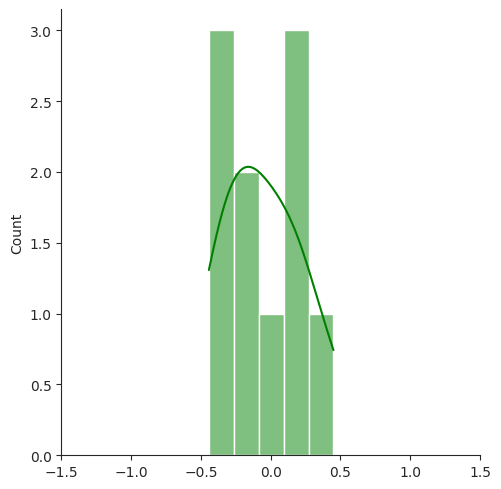

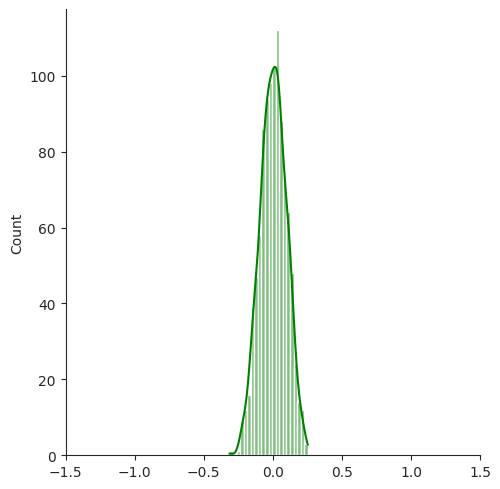

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green',  kde=True)
plt.xlim(-1.5, 1.5)
sns.displot(sample_mean_calculator(x, 100, 1000), color='green',  kde=True)
plt.xlim(-1.5, 1.5)

Sampling from skwed distributions

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


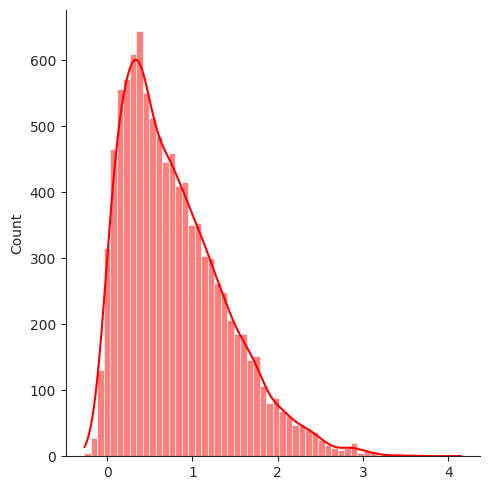

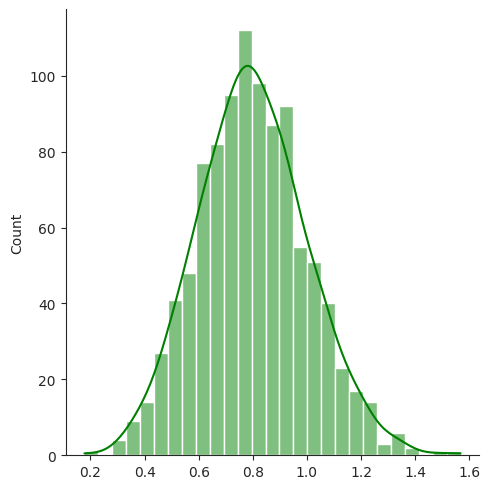

In [ ]:
s = st.skewnorm.rvs(10, size=10000)
sns.displot(s, kde= True, color='red')
sns.displot(sample_mean_calculator(s, 10, 1000), color = 'green', kde= True)

sampling frmo a multimodal distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


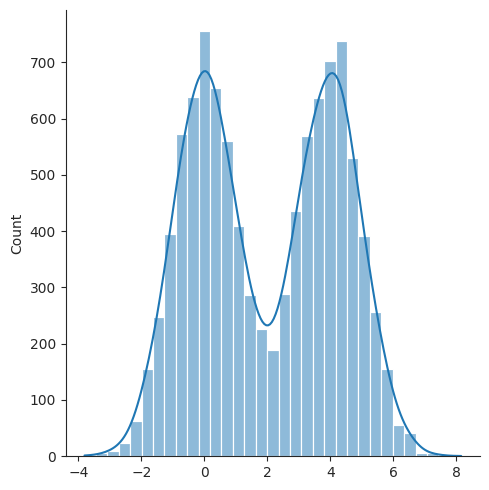

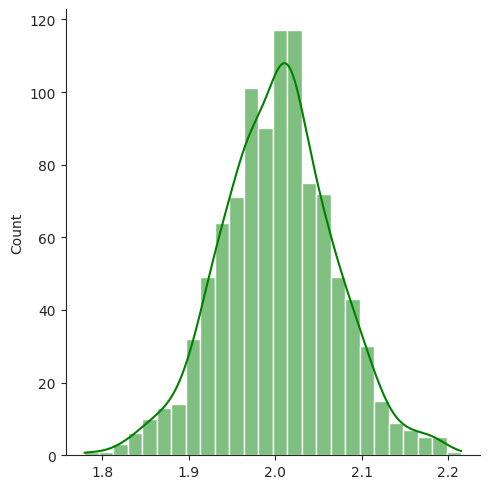

In [ ]:
m = np.concatenate((np.random.normal(size= 5000), np.random.normal(loc=4.0, size=5000)))
sns.displot(m, kde=True)
sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

sampling from uniform
- Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


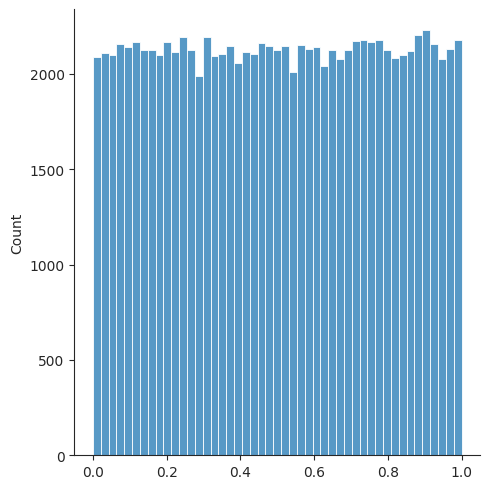

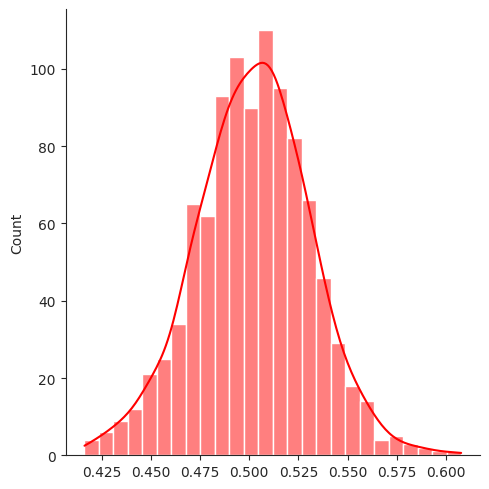

In [ ]:
sns.displot(u)
sns.displot(sample_mean_calculator(u, 100, 1000), color= 'red', kde=True)

- Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

- As an example, the "t-test" (covered in Intro to Stats) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

- (Despite being associated with such a key concept as the CLT, the name "normal distribution" wasn't originally intended to imply that other distributions are "abnormal". It's a historical quirk related to Gauss describing orthogonal (technically a.k.a. "normal") equations associated with applied uses of the distribution.)

- (Finally, you may wonder what the purpose of sampling means is! Well, when we gather data from the real world we are nearly always sampling a subset of all the available data produced by a given random process. And, once we've collected a sample of data, the aspect of it we're often most interested in above all else is its mean.)

---

**Log Normal Distribution**

The **Log-Normal Distribution** is a probability distribution of a random variable whose **natural logarithm is normally distributed**.

If \( Y \) follows a normal distribution:

$$
Y \sim N(\mu, \sigma^2)
$$

Then the random variable $( X = e^Y )$ follows a **log-normal distribution**:

$$
X \sim \text{LogNormal}(\mu, \sigma^2)
$$

The probability density function (PDF) of a log-normal distribution is:

$$
f(x) = \frac{1}{x \sigma \sqrt{2\pi}} e^{-\frac{(\ln x - \mu)^2}{2 \sigma^2}}, \quad x > 0
$$

where:
- \(\mu\) and \(\sigma^2\) are the mean and variance of the **natural logarithm** of \(X\).


Real-world examples:

- Income
- Length of comments in online forums
- Duration of chess games or Rubik's Cube solves
- Size of publicly-available video files
- Number of hospitalized cases in an epidemic where public interventions are involved

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


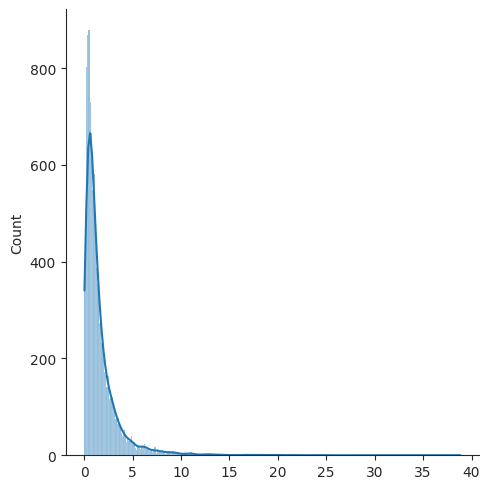

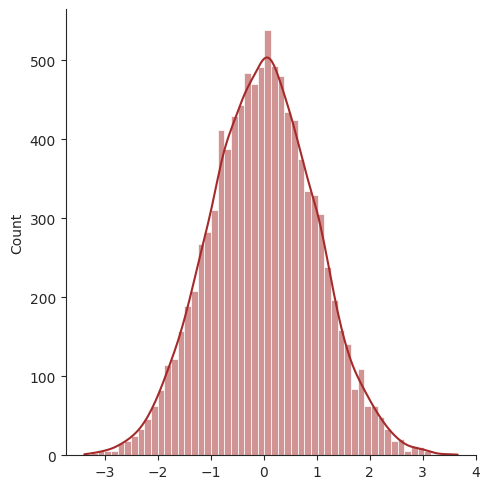

In [ ]:
x = np.random.lognormal(size=10000) #defailt std normal mu = 0 and siigma = 1
sns.displot(x, kde=True)
sns.displot(np.log(x), color='brown', kde=True)

**Exponential Distribution**
- Relatively squished up against zero and then decreases exponentially toward higher values. Log-normal distribution, in contrast, could take negative values and both increases and decreases.

Real-world examples:

- Time between requests to access Wikipedia pages
- Used frequently in deep learning

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


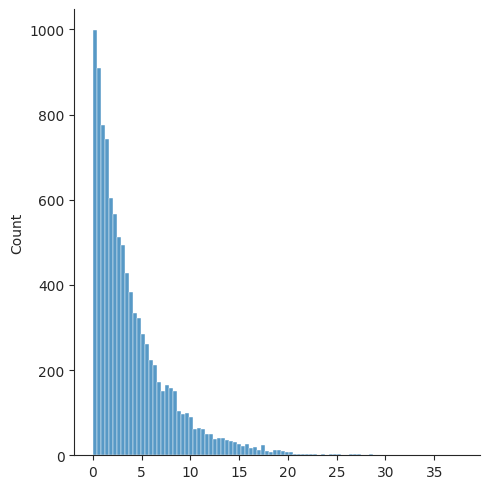

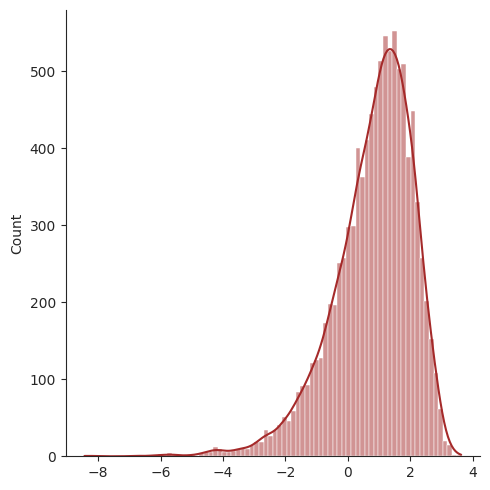

In [ ]:
x = np.random.exponential(scale=4, size=10000)
sns.displot(x)
sns.displot(np.log(x), color='brown', kde=True) # logarithm has a skewed distribution


**Laplace/ Double exponential Distribution**

- Named after Pierre-Simon Laplace, whom we mentioned (and pictured) earlier as a key figure in the development of Bayesian statistics.
- In addition to the scale parameter of the exponential function, it has a location parameter that allows it to be centered on any value:

Real-world examples:

- Extreme weather events, e.g., maximum rainfall in a day
- Many machine learning applications; wherever an acute peak of probability is desired

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


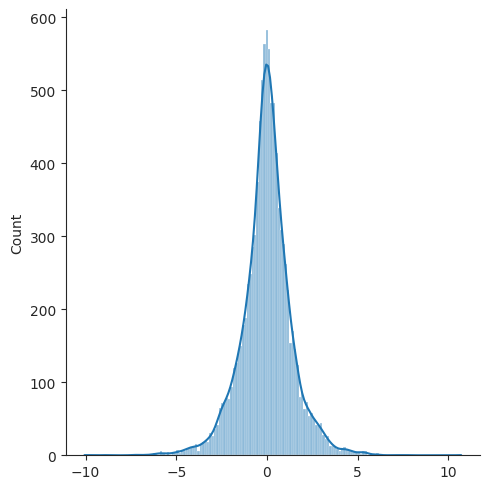

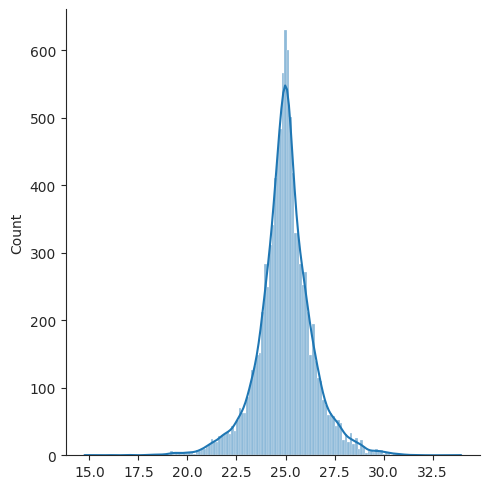

In [ ]:
x = np.random.laplace(size=10000)
sns.displot(x, kde=True)
sns.displot(np.random.laplace(loc=25, size=10000), kde=True)

**Binomial Distribution**

- All distributions so far have been for continuous variables (PDFs). This one is discrete (PMF).
- Its parameters are:

    * n: number of trials
    * p: probability of outcome of 1
    * size: number of experiments with n trials each

- Technically, binomial distributions are created by sampling $n > 1$ "Bernoulli trials". The Bernoulli distribution is equivalent to the binomial distribution where $n = 1$

Real-world examples:

- Making it to work on time
- Candidate being invited to interview
- Epidemiology: probability of death or catching disease


Text(0, 0.5, 'Event probability')

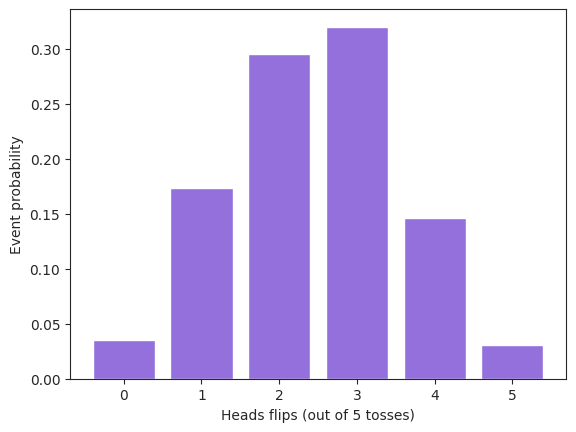

In [ ]:
n = 5
n_experiments = 1000

# fair coin (p=0.5)
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
plt.ylabel('Event probability')


Text(0, 0.5, 'Event probability')

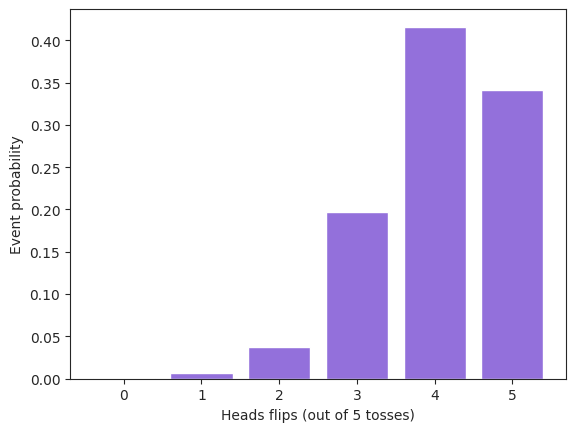

In [ ]:

# weighted coin (p=0.8)
heads_count = np.random.binomial(n, 0.8, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
plt.ylabel('Event probability')



In [ ]:
print(np.random.binomial(1, 0.5))

0


**Multinomial Distribution**

- Generalization of the binomial distribution to discrete random variables with more than two possible outcomes, e.g., the roll of a die:
- As in the binomial case, multinomial distributions are created by sampling n>1 multinoulli distributions, where the multinoulli distribution is equivalent to the multinomial distribution when n = 1:


Since multinomial distributions can represent any categorical variable (e.g., burger, hot dog, pizza; 52 playing cards; NFL teams), not just integer values, we can't always calculate an expected value.

[164 166 174 146 174 176]


Text(0, 0.5, 'Event probability')

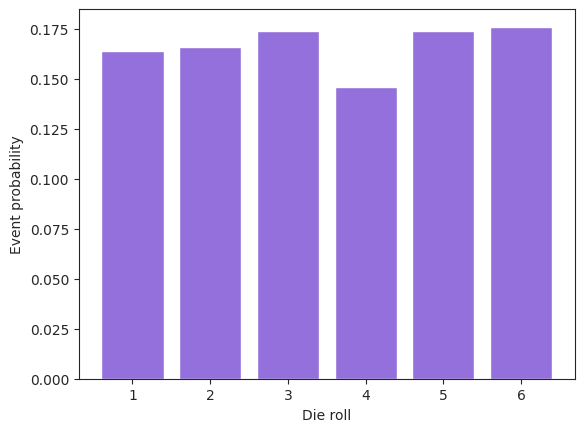

In [ ]:
n = 1000
rolls = np.random.multinomial(n, [1/6.]*6)
print(rolls)
event_proba = rolls/n

plt.bar(range(1, 7), event_proba, color='mediumpurple')
plt.xlabel('Die roll')
plt.ylabel('Event probability')

In [ ]:
np.random.multinomial(1, [1/6.]*6)

array([0, 0, 0, 1, 0, 0])

**Poisson Distribution**

- Poisson is a third widely-used distribution for discrete random variables and it's the final distribution we'll cover.

- It's named after French mathematician Simeon Denis Poisson and is used for count data, e.g.:

- Number of cars that drive by in a minute
- Number of guests at restaurant in an evening
- Number of new hires in a month
- First argument to NumPy poisson() method is $(/lambda)$, which must be greater than zero and guides peak of probability distribution.

- E.g., sampling from Poisson with  $(/lambda) = 5 $ will tend to draw samples near 5.

- Second argument is number of samples to draw:

[6 4 3 5 3 3 6 6 4 4 5 8 6 6 1 3 2 5 6 7]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[  5  32  85 143 155 192 145 112  61  30  23  10   5   2]


Text(0, 0.5, 'P(x)')

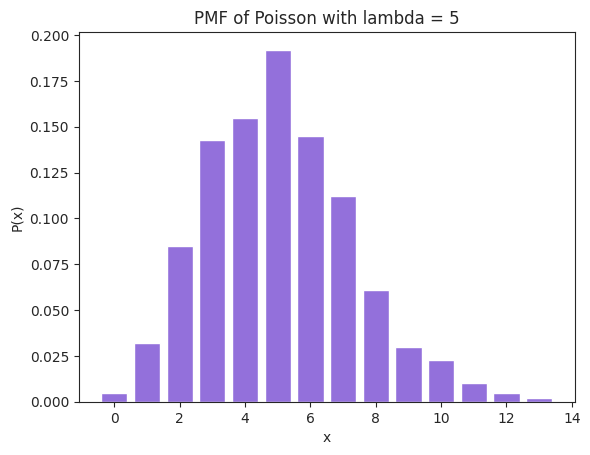

In [ ]:
lam=5
n=1000

samples = np.random.poisson(lam, n)
print(samples[0:20])

x, x_count = np.unique(samples, return_counts=True)
print(x)
print(x_count)
Px = x_count/n

plt.bar(x, Px, color='mediumpurple')
plt.title('PMF of Poisson with lambda = {}'.format(lam))
plt.xlabel('x')
plt.ylabel('P(x)')

**Mixture Distributions**

- Multinomial distribution (driven by `np.random.choice()`) with probabilities set by `coefficients` array determines which of the three distributions to sample from.
- **Gaussian mixture model (GMM)** is common type of mixture distribution, wherein all of the component distributions are normal.



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


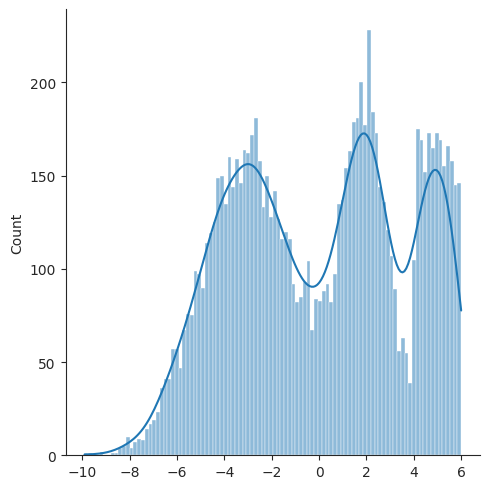

In [ ]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]

coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()      # in case these did not add up to 1
sample_size = 10000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
_ = sns.displot(sample, bins=100, kde=True)

# Statistics

- Cheatsheet: https://github.com/vg11072001/Machine-Learning-Vault/blob/main/ml%20notes/cheatsheet-probability_v2.0.pdf
- https://mathworld.wolfram.com/topics/ProbabilityandStatistics.html
- Machine Learning Foundations series by Jon Krohn's:
  - https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/9780137566273-PSM1_01_01_03/
  - https://github.com/jonkrohn/ML-foundations and https://www.jonkrohn.com/resources
- Probability Bootcamp: https://www.youtube.com/playlist?list=PLMrJAkhIeNNR3sNYvfgiKgcStwuPSts9V
- https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/details/maths-stats-probability.md

## Frequentist Statistics

- z-scores and Outliers
- p-values
- Comparing Means with t-tests
- Confidence Intervals
- ANOVA: Analysis of Variance
- Pearson Correlation Coefficient
- R-Squared Coefficient of Determination
- Correlation vs Causation
- Correcting for Multiple Comparisons

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)


Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.


As an example, the "t-test" (covered shortly in Intro to Stats) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

### **z-scores**



### **p-values**



## Regression

- Features: Independent vs Dependent Variables
- Linear Regression to Predict Continuous Values
- Fitting a Line to Points on a Cartesian Plane
- Ordinary Least Squares
- Logistic Regression to Predict Categories

## Bayesian Statistics

- (Deep) ML vs Frequentist Statistics
- When to use Bayesian Statistics
- Prior Probabilities
- Bayes’ Theorem
- PyMC3 Notebook
- Resources for Further Study of Probability and Statistics

- https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/6-statistics.ipynb

-  Topics with example:

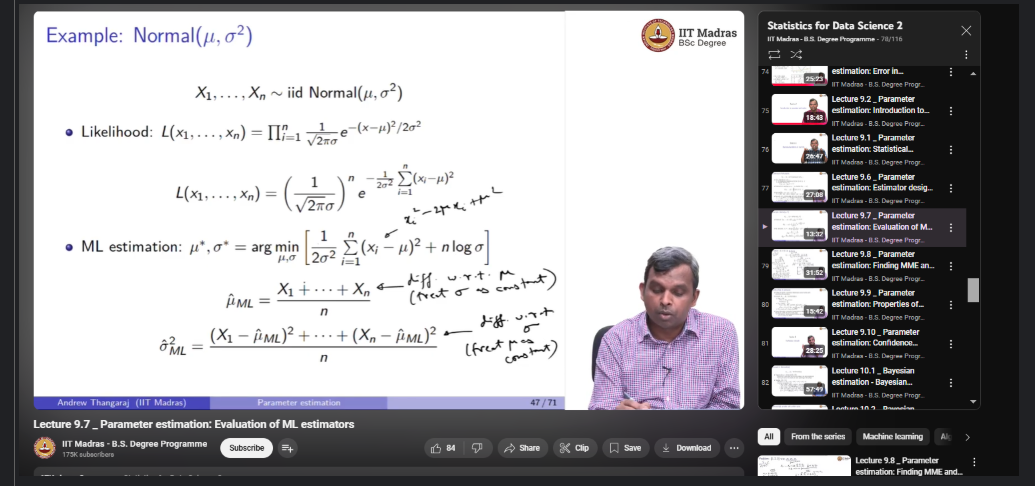
readdddd

In [ ]:
import numpy as np
import scipy.stats as stats
from scipy.optimize import minimize

def method_of_moments(sample, distribution):
    if distribution == 'normal':
        mu_mme = np.mean(sample)
        sigma_mme = np.std(sample, ddof=0)  # Population std dev
        return mu_mme, sigma_mme

    elif distribution == 'exponential':
        lambda_mme = 1 / np.mean(sample)
        return lambda_mme,

    elif distribution == 'poisson':
        lambda_mme = np.mean(sample)
        return lambda_mme,

    else:
        raise ValueError("Unsupported distribution")

def negative_log_likelihood(params, sample, distribution):
    if distribution == 'normal':
        mu, sigma = params
        return -np.sum(stats.norm.logpdf(sample, mu, sigma))

    elif distribution == 'exponential':
        lambda_ = params[0]
        return -np.sum(stats.expon.logpdf(sample, scale=1/lambda_))

    elif distribution == 'poisson':
        lambda_ = params[0]
        return -np.sum(stats.poisson.logpmf(sample, lambda_))

    else:
        raise ValueError("Unsupported distribution")

def maximum_likelihood_estimation(sample, distribution):
    if distribution == 'normal':
        initial_guess = [np.mean(sample), np.std(sample, ddof=0)]
        bounds = [(None, None), (1e-6, None)]

    elif distribution == 'exponential':
        initial_guess = [1 / np.mean(sample)]
        bounds = [(1e-6, None)]

    elif distribution == 'poisson':
        initial_guess = [np.mean(sample)]
        bounds = [(1e-6, None)]

    else:
        raise ValueError("Unsupported distribution")

    result = minimize(negative_log_likelihood, initial_guess, args=(sample, distribution), bounds=bounds)
    return result.x

# Example usage
np.random.seed(42)
sample_normal = np.random.normal(5, 2, size=100)
sample_exponential = np.random.exponential(scale=2, size=100)
sample_poisson = np.random.poisson(lam=4, size=100)

print("MME Normal:", method_of_moments(sample_normal, 'normal'))
print("MLE Normal:", maximum_likelihood_estimation(sample_normal, 'normal'))

print("MME Exponential:", method_of_moments(sample_exponential, 'exponential'))
print("MLE Exponential:", maximum_likelihood_estimation(sample_exponential, 'exponential'))

print("MME Poisson:", method_of_moments(sample_poisson, 'poisson'))
print("MLE Poisson:", maximum_likelihood_estimation(sample_poisson, 'poisson'))


MME Normal: (4.792306965211812, 1.8072323532892594)
MLE Normal: [4.79230697 1.80723235]
MME Exponential: (0.5319254050708648,)
MLE Exponential: [0.53192541]
MME Poisson: (3.89,)
MLE Poisson: [3.89]


**bold text**![image.png](attachment:0b8339da-75c9-411b-925d-cf02fc36873b.png)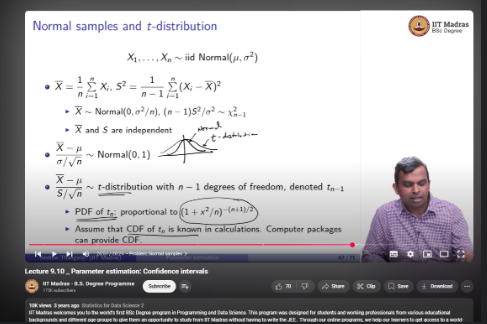

### **Derivation of Loss Functions for Linear and Logistic Regression from Probability Theory**

Loss functions in both **Linear Regression (MSE)** and **Logistic Regression (Log-Loss)** can be derived from probability principles, primarily using the concept of Maximum Likelihood Estimation (MLE).


#### **1. Linear Regression: Mean Squared Error (MSE) Derivation**

##### **Step 1: Assume a Probability Distribution for Errors**
- In **Linear Regression**, we assume that the target variable \( y \) follows a **normal distribution** with a mean equal to the predicted value \( \hat{y} \):

  $$ y_i = X_i \beta + \epsilon, \quad \text{where} \quad \epsilon \sim \mathcal{N}(0, \sigma^2) $$

  So, the likelihood of observing \( y_i \) given \( X_i \) and parameters \( \beta \) is:

  $$ P(y_i | X_i, \beta) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y_i - X_i \beta)^2}{2\sigma^2} \right) $$

##### **Step 2: Log-Likelihood Function**
For a dataset with \( n \) independent samples:

$$ L(\beta) = \prod_{i=1}^{n} P(y_i | X_i, \beta) $$

Taking the **log** to get the log-likelihood function:

$$ \log L(\beta) = \sum_{i=1}^{n} \left[ -\frac{1}{2} \log(2\pi\sigma^2) - \frac{(y_i - X_i \beta)^2}{2\sigma^2} \right] $$

##### **Step 3: Maximum Likelihood Estimation (MLE)**
- To maximize \( \log L(\beta) \), we only need to minimize the sum of squared errors:

  $$ \min_{\beta} \sum_{i=1}^{n} (y_i - X_i\beta)^2 $$

  - This is exactly the **Mean Squared Error (MSE)** loss function:

    $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

  - MSE arises naturally as the **MLE solution** under the assumption of normally distributed errors.



#### **2. Logistic Regression: Log-Loss (Binary Cross-Entropy) Derivation**

##### **Step 1: Assume a Bernoulli Probability Distribution**
- In **Logistic Regression**, the target variable \( y \) is binary \( (y \in \{0,1\}) \).
- We model the probability of \( y = 1 \) using the **sigmoid function**:

  $$ P(y_i = 1 | X_i, \beta) = \hat{y}_i = \frac{1}{1 + e^{-X_i \beta}} $$

  The probability mass function of the **Bernoulli distribution**:

  $$ P(y_i | X_i, \beta) = \hat{y}_i^{y_i} (1 - \hat{y}_i)^{(1 - y_i)} $$

##### **Step 2: Log-Likelihood Function**
For \( n \) independent samples, the likelihood function is:

$$ L(\beta) = \prod_{i=1}^{n} \hat{y}_i^{y_i} (1 - \hat{y}_i)^{(1 - y_i)} $$

Taking the **log** to get the log-likelihood:

$$ \log L(\beta) = \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$

##### **Step 3: Maximum Likelihood Estimation (MLE)**
- **Maximizing** the log-likelihood is equivalent to **minimizing** the negative log-likelihood:

  $$ \min_{\beta} -\sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$

  - This is the **Binary Cross-Entropy (Log-Loss)** function:

    $$ \text{Log-Loss} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$

  - Unlike MSE, **Log-Loss is convex** and better suited for **classification problems**.



#### **Key Takeaways**

| **Regression Type** | **Assumed Distribution** | **Log-Likelihood Function** | **Loss Function** |
|----------------|--------------------|---------------------|--------------------|
| **Linear Regression** | Normal $( \mathcal{N}(\mu, \sigma^2) )$ | $( -\sum (y_i - \hat{y}_i)^2 )$ | **Mean Squared Error (MSE)** |
| **Logistic Regression** | Bernoulli $( P(y) = p^y (1 - p)^{1-y} )$ | $( -\sum [ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) ] )$ | **Log-Loss (Cross-Entropy)** |

##### **Why MSE for Linear Regression but Log-Loss for Logistic Regression?**
- **MSE assumes Gaussian noise**, which works well when \( y \) is continuous.
- **Logistic Regression assumes Bernoulli-distributed outputs**, and Log-Loss is the natural loss function for classification.
- Using MSE in logistic regression would result in **non-convex optimization**, making training inefficient.



This derivation explains why **MSE is used for linear regression** and **Log-Loss is used for logistic regression** based on probability theory. Let me know if you need further clarifications! 🚀

TBD

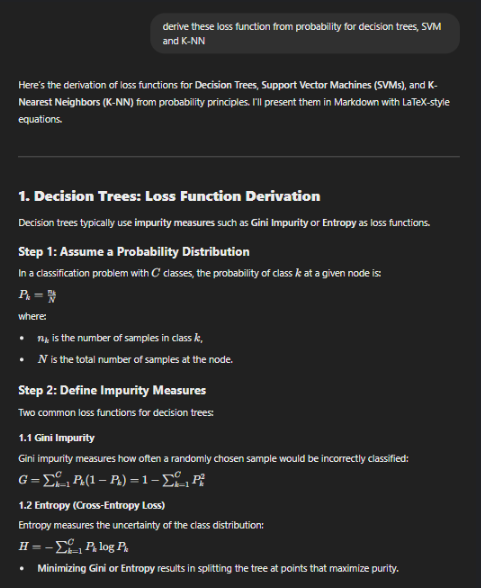

- Scipy codes to learn coding this part

# Data Science and Alogrithm

Define ML algorithm code example

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

import numpy as np

data = load_iris()
X , y = data.data, data.target

new_observ = np.array([[14, 3, 4, 6]])
model = RandomForestClassifier()

model.fit(X, y)

model.predict(new_observ)

array([2])

Some terms

- **First 5 chapters of 100 page ML book**

- **Bias - Variance Trade-off**:
    - Linear algorithms(Linear, logistics, ) are having high biaa and parametric, as they are less accurate but mre precise
    - SVM, Desicion trees, Naive Bayes hitting targets, but predictions are scattered, less precise, and more accurate
    - Best Model: Low bia and low variance: High preicison and high accuracy done with hupyer parameter tuning


    - Bias: Amount of assumption ML model is making about data , if more assum - high bias

    - Variance: Retraining on different dataset => different model, and how the predictions are coming from new model, so difference/ variance in output

---
- **Parametric and non-parametric:**


---
- **Regularization different types:**


---
- **K means clustering:**


---
- **Bagging, Random Forests, Boosting, and Bayesian Additive Regression Trees:**


---
- **Model evaluation metrics (accuracy, precision, recall, AUC):**

#### **Evaluation Metrics for Imbalanced Data**

##### **1. Precision**
###### *Definition:*
Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It focuses on reducing false positives.

$$
Precision = \frac{TP}{TP + FP}
$$

Where:
- **TP** = True Positives (Correctly predicted positive cases)
- **FP** = False Positives (Incorrectly predicted positive cases)

**Use Case:** Important in fraud detection, where false positives can be costly.


##### **2. Recall (Sensitivity, True Positive Rate)**
###### *Definition:*
Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It focuses on reducing false negatives.

$$
Recall = \frac{TP}{TP + FN}
$$

Where:
- **FN** = False Negatives (Missed positive cases)

**Use Case:** Crucial in medical diagnosis, where missing a disease (false negative) is dangerous.


##### **3. F1-Score**
###### *Definition:*
F1-Score is the harmonic mean of precision and recall, providing a balance between the two metrics.

$$
F1\text{-}Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

**Use Case:** Useful when both false positives and false negatives are equally important.


##### **4. AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**
###### *Definition:*
AUC-ROC measures a model’s ability to distinguish between classes. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various thresholds.

$$
TPR = \frac{TP}{TP + FN}
$$
$$
FPR = \frac{FP}{FP + TN}
$$

AUC (Area Under Curve) ranges from **0 to 1**, where **1** indicates perfect classification.

**Use Case:** Best suited for evaluating overall model performance, especially for imbalanced datasets.


##### **5. Confusion Matrix**
###### *Definition:*
A confusion matrix provides a detailed breakdown of actual vs. predicted classifications.

| Actual / Predicted | Positive Prediction | Negative Prediction |
|--------------------|---------------------|---------------------|
| **Positive Class** | True Positive (TP)  | False Negative (FN) |
| **Negative Class** | False Positive (FP) | True Negative (TN)  |

**Use Case:** Helps analyze model errors and understand prediction distribution.


These metrics are essential for evaluating machine learning models, especially for imbalanced datasets. Choosing the right metric depends on the specific problem domain and the cost of false positives or false negatives.



# Deep Learning and Algorithms


**Optimizers**

Link: https://www.youtube.com/watch?v=MD2fYip6QsQ&list=WL

### Optimization Algorithms Equations

#### 1. Stochastic Gradient Descent (SGD)
SGD updates the weights using the following equation:

$$ w_{t+1} = w_t - \eta \nabla L(w_t) $$

where:
- $w_t$ are the model parameters at time step $t$,
- $\eta$ is the learning rate,
- $\nabla L(w_t)$ is the gradient of the loss function.

#### 2. Momentum-based SGD
Momentum helps accelerate gradients by adding a fraction of the previous update:

$$ v_t = \beta v_{t-1} + (1-\beta) \nabla L(w_t) $$
$$ w_{t+1} = w_t - \eta v_t $$

where:
- $v_t$ is the velocity term,
- $\beta$ is the momentum coefficient.

#### 3. RMSProp
RMSProp adapts the learning rate for each parameter:

$$ E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) (\nabla L(w_t))^2 $$
$$ w_{t+1} = w_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \nabla L(w_t) $$

where:
- $E[g^2]_t$ is the moving average of squared gradients,
- $\gamma$ is the decay rate,
- $\epsilon$ is a small constant for numerical stability.

#### 4. Adam (Adaptive Moment Estimation)
Adam combines momentum and RMSProp:

$$ m_t = \beta_1 m_{t-1} + (1-\beta_1) \nabla L(w_t) $$
$$ v_t = \beta_2 v_{t-1} + (1-\beta_2) (\nabla L(w_t))^2 $$

Bias-corrected estimates:

$$ \hat{m}_t = \frac{m_t}{1-\beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1-\beta_2^t} $$

Update rule:

$$ w_{t+1} = w_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t $$

where:
- $m_t$ is the first moment estimate (momentum),
- $v_t$ is the second moment estimate (variance),
- $\beta_1, \beta_2$ are exponential decay rates.

#### 5. Adagrad
Adagrad adapts learning rates element-wise:

$$ G_t = G_{t-1} + (\nabla L(w_t))^2 $$
$$ w_{t+1} = w_t - \frac{\eta}{\sqrt{G_t} + \epsilon} \nabla L(w_t) $$

where:
- $G_t$ is the sum of past squared gradients.

#### 6. AdaDelta
AdaDelta restricts the accumulation of past gradients:

$$ E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma) (\nabla L(w_t))^2 $$
$$ \Delta w_t = - \frac{\sqrt{E[\Delta w^2]_{t-1} + \epsilon}}{\sqrt{E[g^2]_t + \epsilon}} \nabla L(w_t) $$
$$ w_{t+1} = w_t + \Delta w_t $$

where:
- $E[\Delta w^2]$ is the moving average of past updates.

#### 7. NAdam (Nesterov-accelerated Adam)
NAdam incorporates Nesterov momentum into Adam:

$$ m_t = \beta_1 m_{t-1} + (1-\beta_1) \nabla L(w_t) $$
$$ v_t = \beta_2 v_{t-1} + (1-\beta_2) (\nabla L(w_t))^2 $$
$$ \hat{m}_t = \frac{m_t}{1-\beta_1^t} $$
$$ \hat{v}_t = \frac{v_t}{1-\beta_2^t} $$
$$ w_{t+1} = w_t - \eta \left( \frac{\beta_1 \hat{m}_t + (1 - \beta_1) \nabla L(w_t)}{\sqrt{\hat{v}_t} + \epsilon} \right) $$

These equations define the key optimizers used in deep learning and machine learning.

- Optimizers:

 From Stochastic Gradient Descent to Adam,

# Natural Language Processing

## Tokenizers

- Text into words (can be subwords), converted into ids using lookup table (from vocabulary strategy we define)
- this can have multiple algorithms to decided i
    - how text can be divided to words and converted to splits
    - and merge on basis of some scores,
    - creates a vocab,
    - which will use it finally tokenise the input text!
- further present in embedding which enter as input in embedding matrix (using the tokens index)!

More refined way:

Tokenization algorithm
follows the training process closely, in the sense that new inputs are tokenized by applying the following steps:
1. Normalization
2. Pre-tokenization
3. Splitting the words into individual characters
4. Applying the merge rules learned in order on those splits


**Byte Pair Encoding (BPE)**

1. Initialize the vocabulary with all the bytes or characters in the text corpus
2. Calculate the frequency of each byte or character in the text corpus.
3. Repeat the following steps until the desired vocabulary size is reached:
    1. Find the most frequent pair of consecutive bytes or characters in the text corpus
    2. Merge the pair to create a new subword unit.
    3. Update the frequency counts of all the bytes or characters that contain the merged pair.
    4. Add the new subword unit to the vocabulary.

- https://github.com/vg11072001/Python-programming/blob/main/DSA%20Python/999.BytePairEncoding.ipynb
  
**WordPiece**



**SentencePiece**

- its runs on level of unicode code points
- sentence piece supports number of algorithms to training vocabulary.

Lets see byte pair encoding algorithm, :
- BPE on code points, if we have some rare code points checked by` character coverage` then it converts to , 2 options:
    - UNK token
    - if byte_fallback is on, it encodes them to utf-8 and encode the raw bytes

- Basics: https://github.com/vg11072001/Python-programming/blob/main/Basics%20of%20Programming/Data-to-bits.md

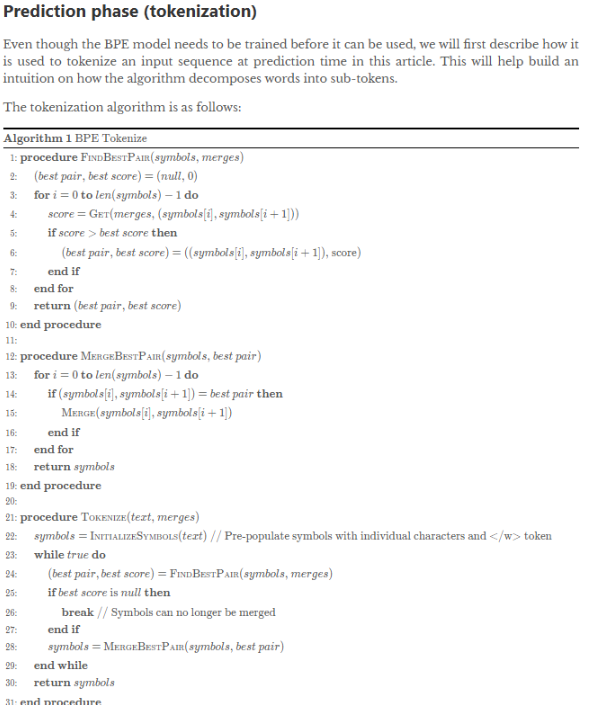

In [ ]:
# BPE Algorihtm

import re
from collections import defaultdict

def get_stats(vocab):
    """
    Given a vocabulary (dictionary mapping words to frequency counts), returns a
    dictionary of tuples representing the frequency count of pairs of characters
    in the vocabulary.
    """
    pairs = defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    return pairs

def merge_vocab(pair, v_in):
    """
    Given a pair of characters and a vocabulary, returns a new vocabulary with the
    pair of characters merged together wherever they appear.
    """
    v_out = {}
    print(pair)
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    # print(bigram)
    # print(p)
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

def get_vocab(data):
    """
    Given a list of strings, returns a dictionary of words mapping to their frequency
    count in the data.
    """
    vocab = defaultdict(int)
    for line in data:
        for word in line.split():
            vocab[' '.join(list(word)) + ' </w>'] += 1
    return vocab

def byte_pair_encoding(data, n):
    """
    Given a list of strings and an integer n, returns a list of n merged pairs
    of characters found in the vocabulary of the input data.
    """
    vocab = get_vocab(data)
    print(vocab)
    for i in range(n):
        pairs = get_stats(vocab)

        best = max(pairs, key=pairs.get)
        # print(best)
        vocab = merge_vocab(best, vocab)
        # break
    return vocab

# Example usage:
corpus = '''Tokenization is the process of breaking down
a sequence of text into smaller units called tokens,
which can be words, phrases, or even individual characters.
Tokenization is often the first step in natural languages processing tasks
such as text classification, named entity recognition, and sentiment analysis.
The resulting tokens are typically used as input to further processing steps,
such as vectorization, where the tokens are converted
into numerical representations for machine learning models to use.'''
data = corpus.split('.') # to convert it to sentences

n = 230
bpe_pairs = byte_pair_encoding(data, n)
bpe_pairs


defaultdict(<class 'int'>, {'T o k e n i z a t i o n </w>': 2, 'i s </w>': 2, 't h e </w>': 3, 'p r o c e s s </w>': 1, 'o f </w>': 2, 'b r e a k i n g </w>': 1, 'd o w n </w>': 1, 'a </w>': 1, 's e q u e n c e </w>': 1, 't e x t </w>': 2, 'i n t o </w>': 2, 's m a l l e r </w>': 1, 'u n i t s </w>': 1, 'c a l l e d </w>': 1, 't o k e n s , </w>': 1, 'w h i c h </w>': 1, 'c a n </w>': 1, 'b e </w>': 1, 'w o r d s , </w>': 1, 'p h r a s e s , </w>': 1, 'o r </w>': 1, 'e v e n </w>': 1, 'i n d i v i d u a l </w>': 1, 'c h a r a c t e r s </w>': 1, 'o f t e n </w>': 1, 'f i r s t </w>': 1, 's t e p </w>': 1, 'i n </w>': 1, 'n a t u r a l </w>': 1, 'l a n g u a g e s </w>': 1, 'p r o c e s s i n g </w>': 2, 't a s k s </w>': 1, 's u c h </w>': 2, 'a s </w>': 3, 'c l a s s i f i c a t i o n , </w>': 1, 'n a m e d </w>': 1, 'e n t i t y </w>': 1, 'r e c o g n i t i o n , </w>': 1, 'a n d </w>': 1, 's e n t i m e n t </w>': 1, 'a n a l y s i s </w>': 1, 'T h e </w>': 1, 'r e s u l t i n g </w

{'Tokenization</w>': 2,
 'is</w>': 2,
 'the</w>': 3,
 'process</w>': 1,
 'of</w>': 2,
 'breaking</w>': 1,
 'down</w>': 1,
 'a</w>': 1,
 'sequence</w>': 1,
 'text</w>': 2,
 'into</w>': 2,
 'smaller</w>': 1,
 'units</w>': 1,
 'called</w>': 1,
 'tokens,</w>': 1,
 'which</w>': 1,
 'can</w>': 1,
 'be</w>': 1,
 'words,</w>': 1,
 'phrases,</w>': 1,
 'or</w>': 1,
 'even</w>': 1,
 'individual</w>': 1,
 'characters</w>': 1,
 'often</w>': 1,
 'first</w>': 1,
 'step</w>': 1,
 'in</w>': 1,
 'natural</w>': 1,
 'languages</w>': 1,
 'processing</w>': 2,
 'tasks</w>': 1,
 'such</w>': 2,
 'as</w>': 3,
 'classification,</w>': 1,
 'named</w>': 1,
 'entity</w>': 1,
 'recognition,</w>': 1,
 'and</w>': 1,
 'sentiment</w>': 1,
 'analysis</w>': 1,
 'The</w>': 1,
 'resulting</w>': 1,
 'tokens</w>': 2,
 'are</w>': 2,
 'typically</w>': 1,
 'used</w>': 1,
 'input</w>': 1,
 'to</w>': 2,
 'further</w>': 1,
 'steps,</w>': 1,
 'vectorization,</w>': 1,
 'where</w>': 1,
 'converted</w>': 1,
 'numerical</w>': 1,
 'repres

In [ ]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

# ---
text = "Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception."
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience

vocab_size = 276 # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  print(f"merging {pair} into a new token {idx}")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

In [ ]:
# train a sentencepiece model on it
# the settings here are (best effort) those used for training Llama 2
import os

options = dict(

# input spec
  input="toy.txt",
  input_format="text",

# output spec
  model_prefix="tok400", # output filename prefix

# algorithm spec
  # BPE alg
  model_type="bpe",
  vocab_size=400,

# normalization of input data
  normalization_rule_name="identity", # ew, turn off normalization
  remove_extra_whitespaces=False,
  input_sentence_size=200000000, # max number of training sentences
  max_sentence_length=4192, # max number of bytes per sentence
  seed_sentencepiece_size=1000000,
  shuffle_input_sentence=True,

# rare word treatment
  character_coverage=0.99995,
  byte_fallback=True,

# merge rules
  split_digits=True,
  split_by_unicode_script=True,
  split_by_whitespace=True,
  split_by_number=True,
  max_sentencepiece_length=16,
  add_dummy_prefix=True,
  allow_whitespace_only_pieces=True,

# special tokens
  unk_id=0, # the UNK token MUST exist
  bos_id=1, # the others are optional, set to -1 to turn off
  eos_id=2,
  pad_id=-1,

# systems
  num_threads=os.cpu_count(), # use ~all system resources
)

spm.SentencePieceTrainer.train(**options)



Tokenization is at the heart of much weirdness of LLMs. Do not brush it off.

- Why can't LLM spell words? **Tokenization**.
- Why can't LLM do super simple string processing tasks like reversing a string? **Tokenization**.
- Why is LLM worse at non-English languages (e.g. Japanese)? **Tokenization**.
- Why is LLM bad at simple arithmetic? **Tokenization**.
- Why did GPT-2 have more than necessary trouble coding in Python? **Tokenization**.
- Why did my LLM abruptly halt when it sees the string "<|endoftext|>"? **Tokenization**.
- What is this weird warning I get about a "trailing whitespace"? **Tokenization**.
- Why the LLM break if I ask it about "SolidGoldMagikarp"? **Tokenization**.
- Why should I prefer to use YAML over JSON with LLMs? **Tokenization**.
- Why is LLM not actually end-to-end language modeling? **Tokenization**.
- What is the real root of suffering? **Tokenization**.
https://tiktokenizer.vercel.app

Reference:

- https://huggingface.co/learn/nlp-course/en/chapter6/3?fw=pt

## Bigram

In [ ]:
# if you want to run bigram model, use this in gpt iterator mentioned below

#-----------------------------------------------------Bigram------------------------------------------------------

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel(vocab_size)
m = model.to(device)

#-----------------------------------------------------Bigram------------------------------------------------------


# LLMs

## GPT

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 384
n_head = 6
n_layer = 6
dropout = 0.2
# ------------

torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out


#-----------------------------------------------------GPT------------------------------------------------------


class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # input of size (batch, time-step, channels)
        # output of size (batch, time-step, head size)
        B,T,C = x.shape
        k = self.key(x)   # (B,T,hs)
        q = self.query(x) # (B,T,hs)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * k.shape[-1]**-0.5 # (B, T, hs) @ (B, hs, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,hs)
        out = wei @ v # (B, T, T) @ (B, T, hs) -> (B, T, hs)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(head_size * num_heads, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension (channels), n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class GPTLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

        # better init, not covered in the original GPT video, but important, will cover in followup video
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        # C is channels or can say dimension of that token
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

#-----------------------------------------------------GPT------------------------------------------------------


# model = GPTLanguageModel()
# m = model.to(device)
# # print the number of parameters in the model
# print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# # create a PyTorch optimizer
# optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# for iter in range(max_iters):

#     # every once in a while evaluate the loss on train and val sets
#     if iter % eval_interval == 0 or iter == max_iters - 1:
#         losses = estimate_loss()
#         print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

#     # sample a batch of data
#     xb, yb = get_batch('train')

#     # evaluate the loss
#     logits, loss = model(xb, yb)
#     optimizer.zero_grad(set_to_none=True)
#     loss.backward()
#     optimizer.step()

# # generate from the model
# context = torch.zeros((1, 1), dtype=torch.long, device=device)
# print(decode(m.generate(context, max_new_tokens=500)[0].tolist()))
#open('more.txt', 'w').write(decode(m.generate(context, max_new_tokens=10000)[0].tolist()))

GPT model code, to understand each points with layers

A. **vocab_size** as its important with `tokenization` and `modeling` also
- there's a limit for this, bcoz
1. as it grows embedding table and last linear layer will become computationally expensive
2. as it grows might possible, it becomes undertrain, bcoz lot of paramter to attend
3. if small than better attentions on each token but too large of token might be squished to a singal token, model will not able to decide what chunk or charac is imp

This isone of the parameter we adjust while finetuning , like base model is there, but meta data contain these type of values to adjust on the refining.

---

B. Attention
- its basically a weighted mutiplication of character in a matrix format with one another, more the number more its attending
- **masking** is simple way to diable the attention to some character with other, example when prediction next character, we don't want in trining time to get the weights and attention for current character from future characters.

In [ ]:

class GPTLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

        # better init, not covered in the original GPT video, but important, will cover in followup video
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx



Reference:
- https://github.com/karpathy/ng-video-lecture/tree/master

# Pytorch